Приведены данные по ценам квадратного метра загородки в населенных пунктах МО (статистика с авито, добавлено расстояние от МКАД и численность населения).
https://docs.google.com/spreadsheets/d/1n_LZWqz3hy0FDHoPmEriTgJO27tDDT2VnoH6RLmyhUg/edit?usp=sharing

--
Задачи:
- проанализировать зависимость цен от километража и численности населения,
- понять, есть ли выраженные сезонные колебания цен,
- сделать прогноз на апрель

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

pd.set_option("display.max_columns", 25)
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

Импортируем и подготовим данные.

In [2]:
df = pd.read_csv('C:\\Users\\olhae\\Downloads\\загородка.csv')
df.head()

,Аренда/Продажа,Регион,Город,население,км от МКАД,Кол-во комнат,Цена за,ноя.18,дек.18,янв.19,фев.19,мар.19,апр.19,май.19,июн.19,июл.19,авг.19,сен.19,окт.19,ноя.19,дек.19,янв.20,фев.20,мар.20
0,Продам,Московская область,Апрелевка,30669,28,Все,за м2,61111,51800,48333,50000,52677,55556,54933,52778,52893,53521,53243,54688,57143,59289,59896,62222,61669
1,Продам,Московская область,Балашиха,507366,11,Все,за м2,54167,56818,56604,56054,55093,53333,54615,56738,58594,57500,56767,55333,55714,55333,55800,56000,54545
2,Продам,Московская область,Белоозёрский,17898,61,Все,за м2,27857,27772,27739,27990,27778,29167,29167,29167,28810,28438,28000,27778,28571,29091,30000,29091,27422
3,Продам,Московская область,Бронницы,22531,52,Все,за м2,27917,27778,28824,28571,27577,28037,27800,27857,27222,27143,27816,27816,27778,27816,28471,28636,28333
4,Продам,Московская область,Вербилки,6869,84,Все,за м2,18518,20000,20000,19750,19231,19889,20000,18750,17742,17857,18000,19000,19792,19643,20000,20000,19643


In [3]:
df.tail()

,Аренда/Продажа,Регион,Город,население,км от МКАД,Кол-во комнат,Цена за,ноя.18,дек.18,янв.19,фев.19,мар.19,апр.19,май.19,июн.19,июл.19,авг.19,сен.19,окт.19,ноя.19,дек.19,янв.20,фев.20,мар.20
73,Продам,Московская область,Электрогорск,22653,86,Все,за м2,16000,16667,17000,16458,16667,17000,17000,16837,16667,16667,16667,16447,16667,16667,16667,17000,17692
74,Продам,Московская область,Электроизолятор,4540,72,Все,за м2,21433,21433,21433,21433,21433,21433,21433,21433,21433,23316,21467,21467,21467,22222,21467,21467,21923
75,Продам,Московская область,Электросталь,156026,42,Все,за м2,20909,21667,22222,22000,21667,22500,21429,21333,21389,21264,22648,23000,22500,23226,22273,21250,21000
76,Продам,Московская область,Электроугли,21263,39,Все,за м2,35143,35833,37500,35750,36364,33333,35443,37750,37857,39130,38000,38500,40000,40000,40000,40909,37895
77,Продам,Московская область,Яхрома,14056,65,Все,за м2,32000,30233,28571,36364,37530,30833,29630,34091,34091,32249,32500,32500,32500,31333,31333,31522,35263


In [4]:
df.describe()

,население,км от МКАД,ноя.18,дек.18,янв.19,фев.19,мар.19,апр.19,май.19,июн.19,июл.19,авг.19,сен.19,окт.19,ноя.19,дек.19,янв.20,фев.20,мар.20
count,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00
mean,62825.96,59.68,34879.63,34733.85,34855.47,35235.14,35443.55,35113.22,34700.05,34473.94,34476.45,34356.50,34415.77,34823.08,35089.14,35562.21,35776.58,35945.41,35904.19
std,82415.85,35.97,15236.81,14615.64,14634.45,14650.58,15219.47,15149.46,15188.77,15186.97,15505.27,15353.65,15444.04,15694.75,15595.87,15870.72,15982.57,16156.54,16233.16
min,3309.00,3.00,16000.00,16667.00,17000.00,16458.00,16667.00,16145.00,15625.00,15385.00,15273.00,15077.00,15541.00,15455.00,15833.00,15500.00,15500.00,16429.00,16667.00
25%,11061.75,33.00,24428.75,23857.50,24233.25,24442.50,24166.75,23507.75,23250.00,23866.25,23924.25,23626.50,23352.50,23313.25,23741.50,24071.50,24531.25,24111.00,24193.75
50%,25476.50,57.50,29129.00,30116.50,29514.50,31348.50,30625.00,30972.00,29657.50,29522.50,29939.00,29823.00,29509.00,30422.50,30208.50,30535.00,31250.00,31399.00,31111.00
75%,87602.00,85.50,40714.00,40592.75,40777.75,41250.25,42180.50,41403.25,40681.75,41086.50,40063.75,39782.50,40111.00,40978.00,41875.00,43596.50,43273.75,43184.25,42354.00
max,507366.00,138.00,81027.00,77083.00,75000.00,76923.00,77320.00,75410.00,75000.00,74000.00,79762.00,75258.00,75410.00,79051.00,79618.00,81200.00,83810.00,80905.00,83673.00


Все данные в пределах, разумных для Московской области, но посмотрим, что выбивается за интерквартильный размах:

In [5]:
q1n = df['население'].quantile(0.25)
q3n = df['население'].quantile(0.75)

iqrn = q3n - q1n

boxplot_range_n = (q1n - 1.5 * iqrn, q3n + 1.5 * iqrn)
df[(df['население'] < boxplot_range_n[0]) | (df['население'] > boxplot_range_n[1])]

,Аренда/Продажа,Регион,Город,население,км от МКАД,Кол-во комнат,Цена за,ноя.18,дек.18,янв.19,фев.19,мар.19,апр.19,май.19,июн.19,июл.19,авг.19,сен.19,окт.19,ноя.19,дек.19,янв.20,фев.20,мар.20
1,Продам,Московская область,Балашиха,507366,11,Все,за м2,54167,56818,56604,56054,55093,53333,54615,56738,58594,57500,56767,55333,55714,55333,55800,56000,54545
26,Продам,Московская область,Королев,225858,15,Все,за м2,56180,57333,60000,60802,64130,64130,66387,62344,64130,64752,62500,60976,62500,63987,63712,64706,58022
38,Продам,Московская область,Мытищи,235504,5,Все,за м2,68000,68000,71429,70988,72727,71625,70000,67458,68333,68333,68667,68047,68333,69091,70818,71636,69597
49,Продам,Московская область,Подольск,308130,16,Все,за м2,46667,45385,45436,44286,45000,46077,45000,45000,45000,45000,45714,45714,45238,48000,48649,48649,49383
67,Продам,Московская область,Химки,259550,3,Все,за м2,61667,59839,56250,60833,57576,56667,60714,62500,59500,58000,58140,58667,63333,64286,63571,63889,65933


Видим, что это самые большие города в непосредственной близости к Москве, все верно. Посмотрим для расстояния:

In [6]:
q1s = df['км от МКАД'].quantile(0.25)
q3s = df['км от МКАД'].quantile(0.75)

iqrs = q3s - q1s

boxplot_range_s = (q1s - 1.5 * iqrs, q3s + 1.5 * iqrs)
df[(df['км от МКАД'] < boxplot_range_s[0]) | (df['км от МКАД'] > boxplot_range_s[1])]

,Аренда/Продажа,Регион,Город,население,км от МКАД,Кол-во комнат,Цена за,ноя.18,дек.18,янв.19,фев.19,мар.19,апр.19,май.19,июн.19,июл.19,авг.19,сен.19,окт.19,ноя.19,дек.19,янв.20,фев.20,мар.20


Выбросов по расстоянию нет.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Аренда/Продажа  78 non-null     object
 1   Регион          78 non-null     object
 2   Город           78 non-null     object
 3   население       78 non-null     int64 
 4   км от МКАД      78 non-null     int64 
 5   Кол-во комнат   78 non-null     object
 6   Цена за         78 non-null     object
 7   ноя.18          78 non-null     int64 
 8   дек.18          78 non-null     int64 
 9   янв.19          78 non-null     int64 
 10  фев.19          78 non-null     int64 
 11  мар.19          78 non-null     int64 
 12  апр.19          78 non-null     int64 
 13  май.19          78 non-null     int64 
 14  июн.19          78 non-null     int64 
 15  июл.19          78 non-null     int64 
 16  авг.19          78 non-null     int64 
 17  сен.19          78 non-null     int64 
 18  окт.19      

In [8]:
print(df['Аренда/Продажа'].value_counts())
print(df['Регион'].value_counts())
print(df['Кол-во комнат'].value_counts())
print(df['Цена за'].value_counts())

Продам    78
Name: Аренда/Продажа, dtype: int64
Московская область    78
Name: Регион, dtype: int64
Все    78
Name: Кол-во комнат, dtype: int64
за м2    78
Name: Цена за, dtype: int64


Поскольку все данные по продажам, по Московсской области, цена везде указана за 1 кв.м. и за всю площадь, удалим лишние столбцы

In [9]:
df.drop('Аренда/Продажа', axis=1, inplace=True)
df.drop('Регион', axis=1, inplace=True)
df.drop('Кол-во комнат', axis=1, inplace=True)
df.drop('Цена за', axis=1, inplace=True)

In [10]:
df.head()

,Город,население,км от МКАД,ноя.18,дек.18,янв.19,фев.19,мар.19,апр.19,май.19,июн.19,июл.19,авг.19,сен.19,окт.19,ноя.19,дек.19,янв.20,фев.20,мар.20
0,Апрелевка,30669,28,61111,51800,48333,50000,52677,55556,54933,52778,52893,53521,53243,54688,57143,59289,59896,62222,61669
1,Балашиха,507366,11,54167,56818,56604,56054,55093,53333,54615,56738,58594,57500,56767,55333,55714,55333,55800,56000,54545
2,Белоозёрский,17898,61,27857,27772,27739,27990,27778,29167,29167,29167,28810,28438,28000,27778,28571,29091,30000,29091,27422
3,Бронницы,22531,52,27917,27778,28824,28571,27577,28037,27800,27857,27222,27143,27816,27816,27778,27816,28471,28636,28333
4,Вербилки,6869,84,18518,20000,20000,19750,19231,19889,20000,18750,17742,17857,18000,19000,19792,19643,20000,20000,19643


In [11]:
col_prices = list(df.columns[3:])
col_prices

['ноя.18',
 'дек.18',
 'янв.19',
 'фев.19',
 'мар.19',
 'апр.19',
 'май.19',
 'июн.19',
 'июл.19',
 'авг.19',
 'сен.19',
 'окт.19',
 'ноя.19',
 'дек.19',
 'янв.20',
 'фев.20',
 'мар.20']

# Сезонность 

Для оценки сезонности возьмем данные за 2019 год и посмотрим, как они распределены

In [12]:
df19 = df[col_prices[2:14]]
df19.insert(0, 'Город', df['Город'])
df19

,Город,янв.19,фев.19,мар.19,апр.19,май.19,июн.19,июл.19,авг.19,сен.19,окт.19,ноя.19,дек.19
0,Апрелевка,48333,50000,52677,55556,54933,52778,52893,53521,53243,54688,57143,59289
1,Балашиха,56604,56054,55093,53333,54615,56738,58594,57500,56767,55333,55714,55333
2,Белоозёрский,27739,27990,27778,29167,29167,29167,28810,28438,28000,27778,28571,29091
3,Бронницы,28824,28571,27577,28037,27800,27857,27222,27143,27816,27816,27778,27816
4,Вербилки,20000,19750,19231,19889,20000,18750,17742,17857,18000,19000,19792,19643
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Электрогорск,17000,16458,16667,17000,17000,16837,16667,16667,16667,16447,16667,16667
74,Электроизолятор,21433,21433,21433,21433,21433,21433,21433,23316,21467,21467,21467,22222
75,Электросталь,22222,22000,21667,22500,21429,21333,21389,21264,22648,23000,22500,23226
76,Электроугли,37500,35750,36364,33333,35443,37750,37857,39130,38000,38500,40000,40000


Построим график среднего уровня цен по месяцам:

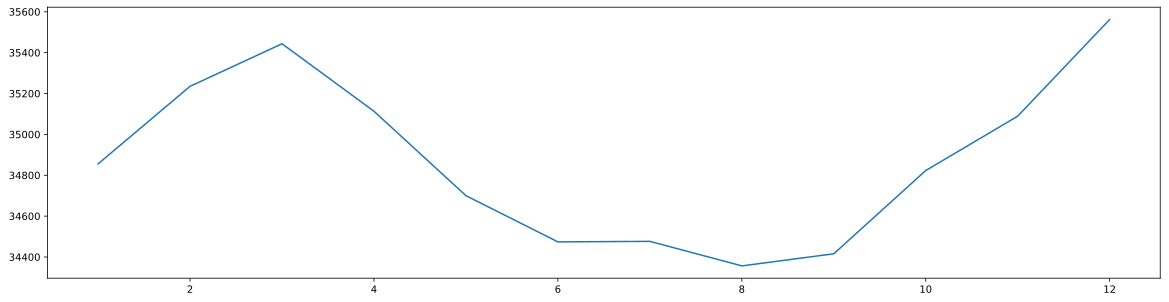

In [13]:
# для средних значений по всем городам:
rcParams["figure.figsize"] = 20, 5

x = np.arange(1, 13)
y = df19.mean()
plt.plot(x, y)

plt.show()

In [14]:
y

янв.19   34855.47
фев.19   35235.14
мар.19   35443.55
апр.19   35113.22
май.19   34700.05
июн.19   34473.94
июл.19   34476.45
авг.19   34356.50
сен.19   34415.77
окт.19   34823.08
ноя.19   35089.14
дек.19   35562.21
dtype: float64

In [15]:
# Посчитаем помесячное соотношение к общему среднему:
z = y/y.mean()
z

янв.19   1.00
фев.19   1.01
мар.19   1.02
апр.19   1.01
май.19   0.99
июн.19   0.99
июл.19   0.99
авг.19   0.99
сен.19   0.99
окт.19   1.00
ноя.19   1.01
дек.19   1.02
dtype: float64

Видим, что в целом наблюдается повышение уровня цен весной и перед новогодними праздниками и снижение в летнем сезоне, что вполне ожидаемо. Но это колебания небольшие, в пределах 1-2%.

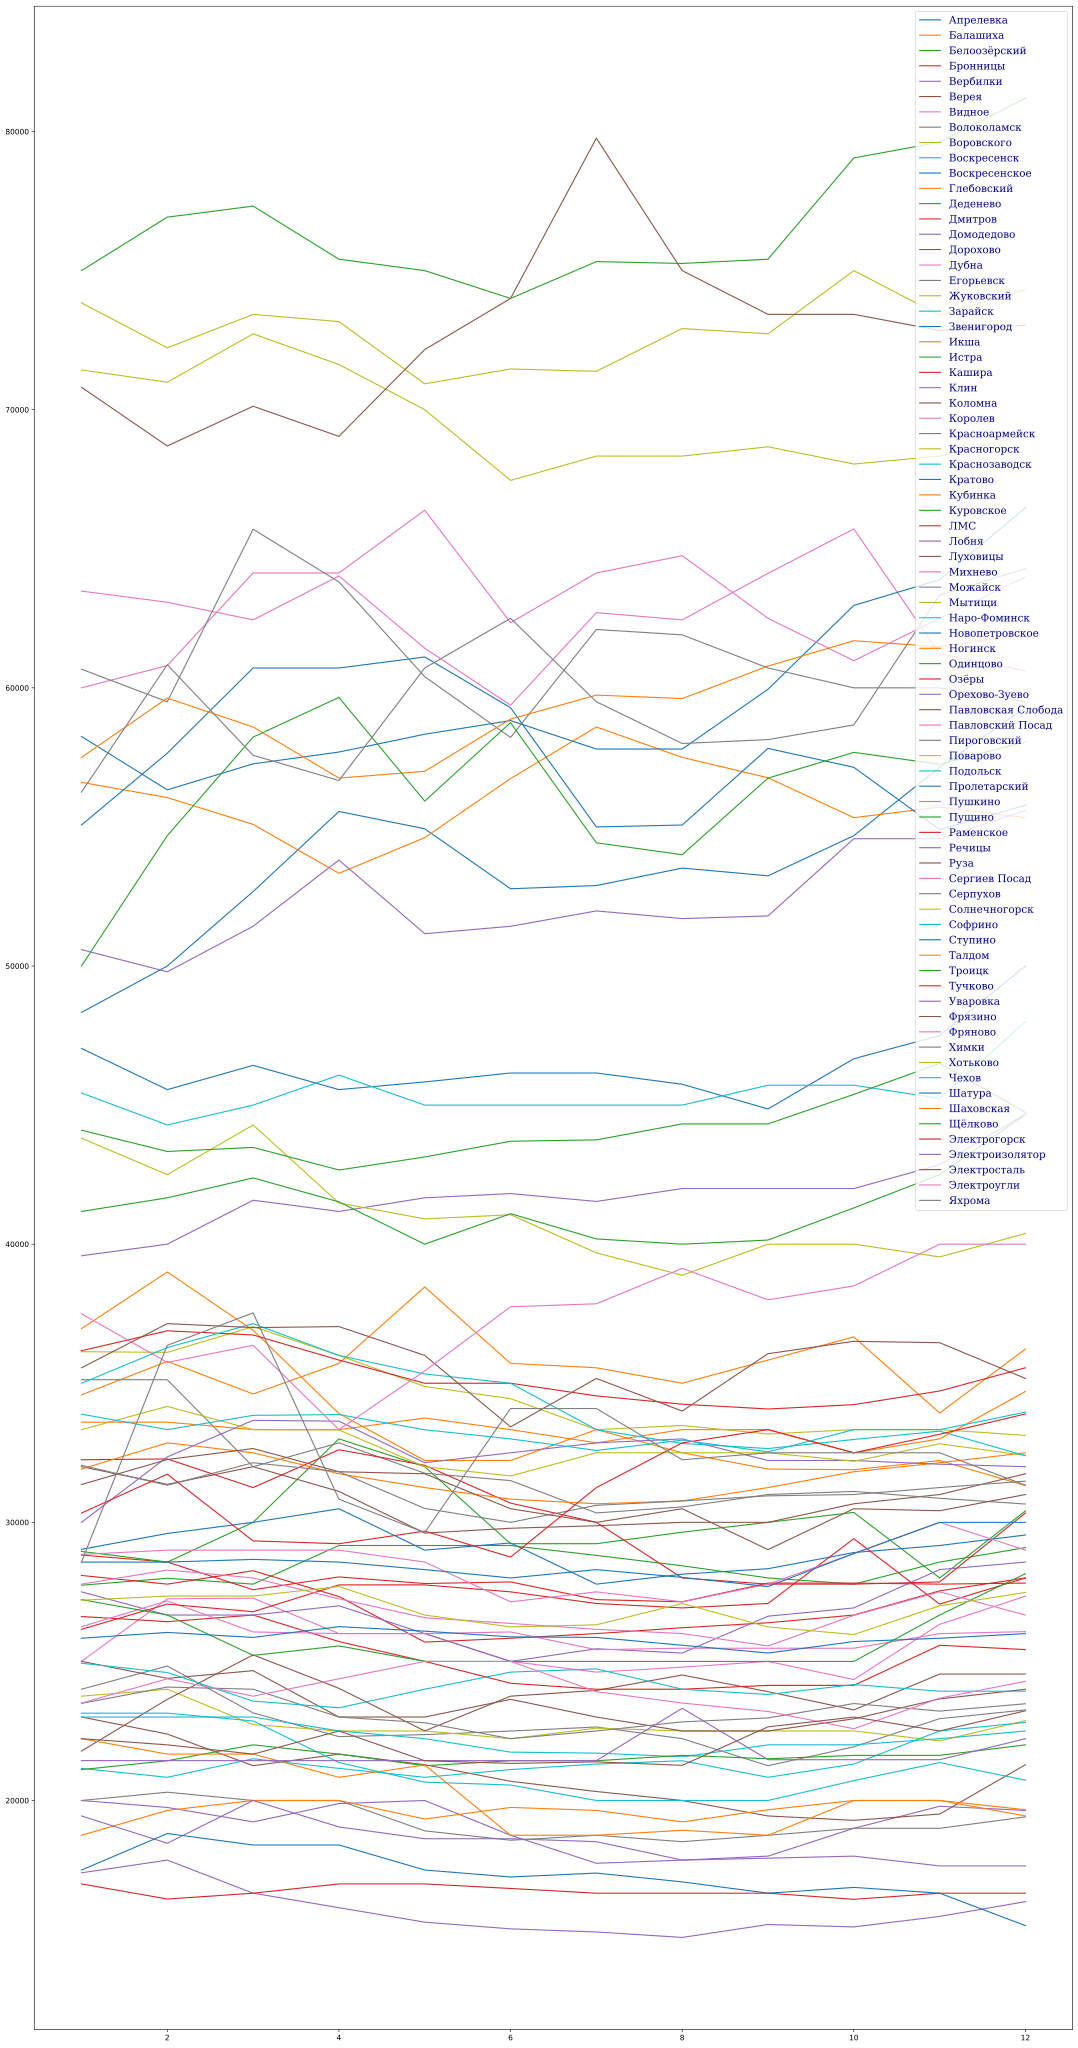

In [16]:
#  для каждого города в отдельности:
rcParams["figure.figsize"] = 25, 50

x = np.arange(1, 13)
for name in df19['Город']:
    y = np.array(df19[(df19['Город'] == name)].select_dtypes(include='int64')).flatten()
    plt.plot(x, y, label=name)

legend_font = {
    "size": 14,
    "family": "serif",
}
legend = plt.legend(loc="upper right", prop=legend_font)
plt.setp(legend.get_texts(), color="DarkBlue")
plt.show()

Видим, что на большинстве графиков отдельных городов сезонность не выражена либо выражена слабо, также есть города, в которых пик стоимости квадратного метра приходится на лето.

In [17]:
# Построим также общий график для всего периода:
df_prices = df[col_prices]
df_prices.insert(0, 'Город', df['Город'])

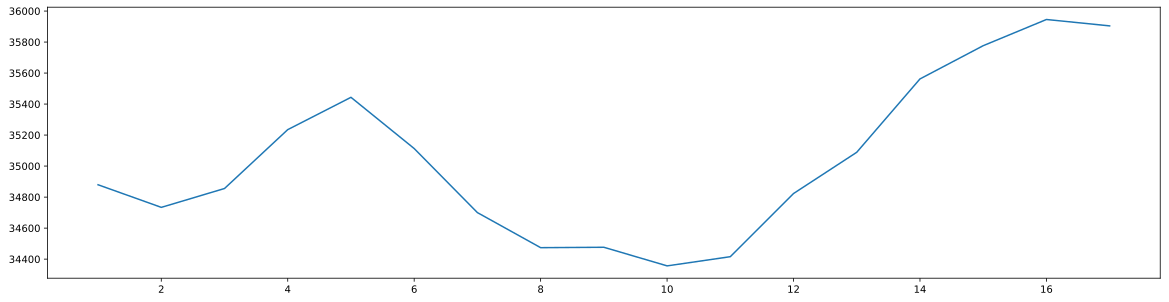

In [18]:
# для средних значений по всему периоду:
rcParams["figure.figsize"] = 20, 5

x = np.arange(1, 18)
y = df_prices.mean()
plt.plot(x, y)

plt.show()

In [19]:
z = y/y.mean()
z

ноя.18   1.00
дек.18   0.99
янв.19   0.99
фев.19   1.01
мар.19   1.01
апр.19   1.00
май.19   0.99
июн.19   0.98
июл.19   0.98
авг.19   0.98
сен.19   0.98
окт.19   0.99
ноя.19   1.00
дек.19   1.01
янв.20   1.02
фев.20   1.03
мар.20   1.02
dtype: float64

In [20]:
# Выборочная несмещенное среднеквадратическое отклонение за 2019 год:
df19[col_prices[2:14]].std(ddof=1)

янв.19   14634.45
фев.19   14650.58
мар.19   15219.47
апр.19   15149.46
май.19   15188.77
июн.19   15186.97
июл.19   15505.27
авг.19   15353.65
сен.19   15444.04
окт.19   15694.75
ноя.19   15595.87
дек.19   15870.72
dtype: float64

In [21]:
# по всему периоду:
df_prices[col_prices].std(ddof=1)

ноя.18   15236.81
дек.18   14615.64
янв.19   14634.45
фев.19   14650.58
мар.19   15219.47
апр.19   15149.46
май.19   15188.77
июн.19   15186.97
июл.19   15505.27
авг.19   15353.65
сен.19   15444.04
окт.19   15694.75
ноя.19   15595.87
дек.19   15870.72
янв.20   15982.57
фев.20   16156.54
мар.20   16233.16
dtype: float64

In [22]:
# по всему периоду по городам:
pd.set_option("display.max_rows", 80)
df_t = df_prices.set_index('Город').T.reset_index(drop=False).rename_axis(None)
df_t[list(df_t.columns)[1:]].std(ddof=1)

Город
Апрелевка            4171.34
Балашиха             1298.18
Белоозёрский          733.13
Бронницы              468.24
Вербилки              817.02
Верея                1221.08
Видное               1540.53
Волоколамск           967.72
Воровского            609.43
Воскресенск           496.42
Воскресенское        3487.07
Глебовский           2238.32
Деденево             1581.15
Дмитров               916.56
Домодедово           1623.73
Дорохово              931.87
Дубна                1149.46
Егорьевск             563.50
Жуковский            1460.48
Зарайск               646.52
Звенигород           1535.04
Икша                 1123.81
Истра                1571.70
Кашира               1373.78
Клин                 1115.70
Коломна               929.77
Королев              2881.15
Красноармейск        1691.22
Красногорск          2461.97
Краснозаводск        1271.33
Кратово              2243.12
Кубинка               557.30
Куровское             688.63
ЛМС                  1737.48
Лобня   

Видим, что более заметна просадка в летний период, а также рост в последние месяцы анализируемого периода, что также логично,
так как в долгосрочной перспективе недвижимость имеет тренд к удорожанию.

Итак, в целом по Московской области наблюдаются небольшие сезонные колебания цен, но для каждого отдельно взятого города динамика может быть иной. Проверим зависимость цен от других факторов.

# Зависимость цен от удаленности от МКАД и численности населения

Распределение цены 1 кв.м. по удаленности от МКАД:

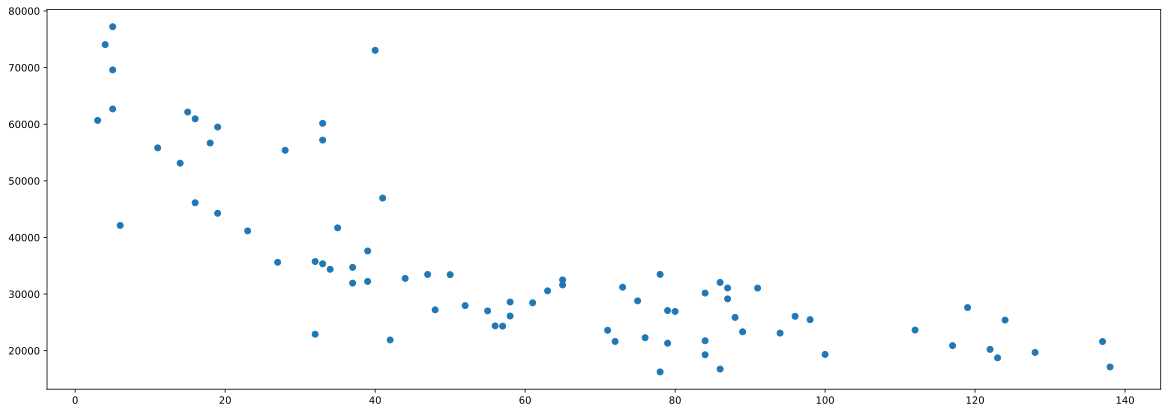

In [23]:
rcParams["figure.figsize"] = 20, 7
x = df['км от МКАД']
y = df[col_prices].sum(axis=1)/len(col_prices)
plt.scatter(x, y)

Распределение удаленностей:

In [24]:
%config InlineBackend.figure_formats = ['svg']
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.facecolor'] = 'white'

In [25]:
def edf(samples, x: float) -> float:
    """Эмпирическая функция распределения (empirical distribution function)"""
    return samples[samples < x].shape[0] / samples.shape[0]

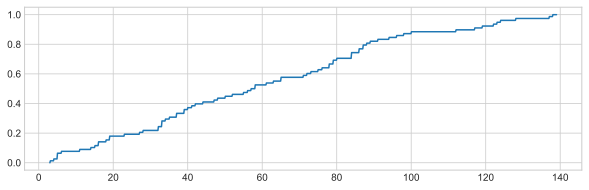

In [26]:
rcParams["figure.figsize"] = 10, 3
ox = np.linspace(3, 139, 1000)
oy = np.array([edf(df['км от МКАД'], x) for x in ox])

plt.plot(ox, oy)

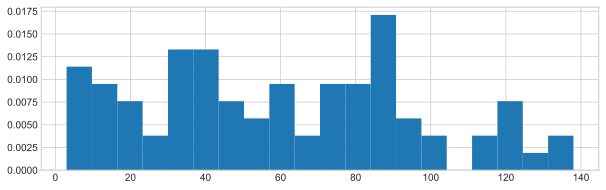

In [27]:
df['км от МКАД'].hist(density=True, bins=20)

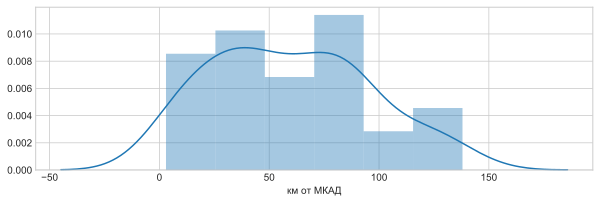

In [28]:
sns.distplot(df['км от МКАД'])

Ряд неоднородный, имеет два пика в районе примерно 25-45 км и 70-85 км.

Распределение цены 1 кв.м. по численности населения:

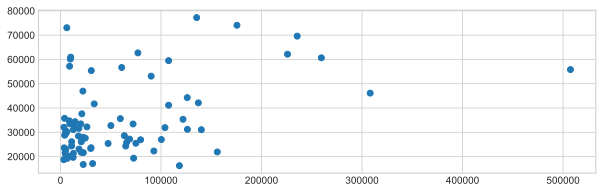

In [29]:
x = df['население']
y = df[col_prices].sum(axis=1)/len(col_prices)
plt.scatter(x, y)

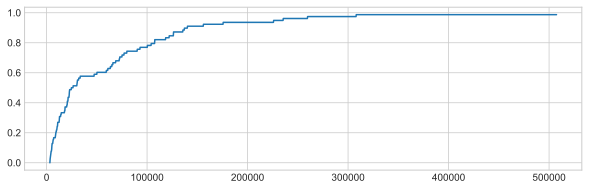

In [30]:
ox = np.linspace(3309, 507366, 2000)
oy = np.array([edf(df['население'], x) for x in ox])

plt.plot(ox, oy)

Распределение цены численности населения:

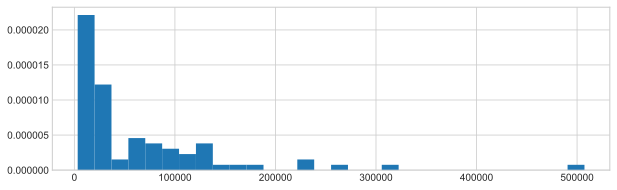

In [31]:
df['население'].hist(density=True, bins=30)

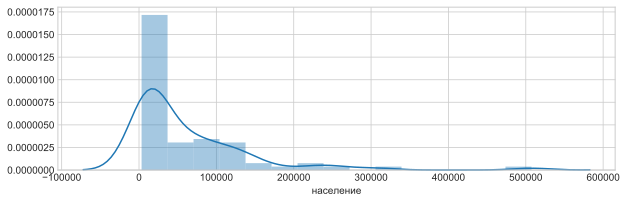

In [32]:
sns.distplot(df['население'])

Большинство значений распределено в диапазоне от минимального (3309) до примерно 130000, резкий пик от минимального до примерно 30000 человек.

Визуально явно прослеживается зависимость цены кв.метра от расстояния, а от количества населения не выражена.

Далее будем работать со средними значениями цены квадратного метра по городам по всему периоду. Добавим соответствующий столбец:

In [33]:
df['mean_prices'] = df[col_prices].mean(axis=1)
df.head()

,Город,население,км от МКАД,ноя.18,дек.18,янв.19,фев.19,мар.19,апр.19,май.19,июн.19,июл.19,авг.19,сен.19,окт.19,ноя.19,дек.19,янв.20,фев.20,мар.20,mean_prices
0,Апрелевка,30669,28,61111,51800,48333,50000,52677,55556,54933,52778,52893,53521,53243,54688,57143,59289,59896,62222,61669,55397.18
1,Балашиха,507366,11,54167,56818,56604,56054,55093,53333,54615,56738,58594,57500,56767,55333,55714,55333,55800,56000,54545,55824.00
2,Белоозёрский,17898,61,27857,27772,27739,27990,27778,29167,29167,29167,28810,28438,28000,27778,28571,29091,30000,29091,27422,28461.06
3,Бронницы,22531,52,27917,27778,28824,28571,27577,28037,27800,27857,27222,27143,27816,27816,27778,27816,28471,28636,28333,27964.24
4,Вербилки,6869,84,18518,20000,20000,19750,19231,19889,20000,18750,17742,17857,18000,19000,19792,19643,20000,20000,19643,19283.24


In [34]:
df_mean = df.copy()
for name in [col_prices]:
    df_mean.drop(name, axis=1, inplace=True)
df_mean.head()

,Город,население,км от МКАД,mean_prices
0,Апрелевка,30669,28,55397.18
1,Балашиха,507366,11,55824.00
2,Белоозёрский,17898,61,28461.06
3,Бронницы,22531,52,27964.24
4,Вербилки,6869,84,19283.24


In [35]:
df_mean.describe()

,население,км от МКАД,mean_prices
count,78.00,78.00,78.00
mean,62825.96,59.68,35046.13
std,82415.85,35.97,15337.15
min,3309.00,3.00,16252.35
25%,11061.75,33.00,23817.51
50%,25476.50,57.50,30814.32
75%,87602.00,85.50,41563.09
max,507366.00,138.00,77221.24


Посмотрим, как распределены эти значения:

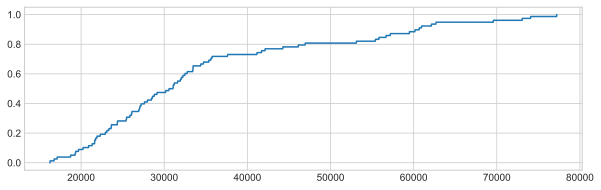

In [36]:
ox = np.linspace(16252, 77222, 2000)
oy = np.array([edf(df['mean_prices'], x) for x in ox])

plt.plot(ox, oy)

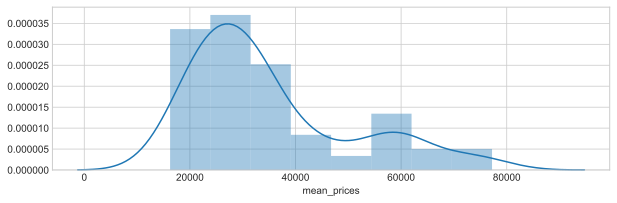

In [37]:
sns.distplot(df['mean_prices'])

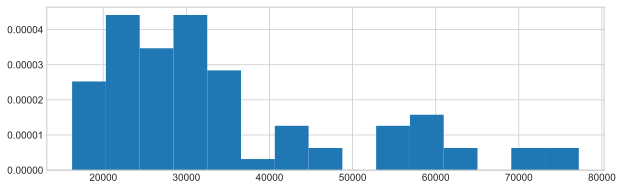

In [38]:
df_mean['mean_prices'].hist(density=True, bins=15)

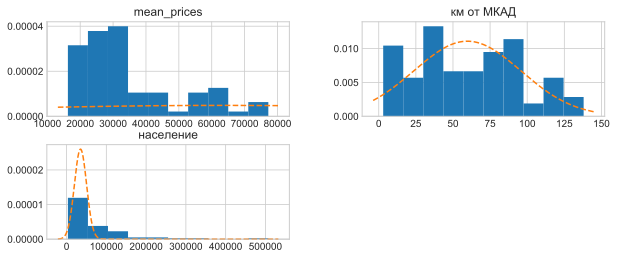

In [39]:
keys = ['население', 'км от МКАД', 'mean_prices']

axes = df[keys].hist(density=True, figsize=(10, 4))

for key, ax in zip(keys, axes.flatten()):
    loc = df[key].mean()
    scale = df[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')

Видим, что ни одна величина не распределена нормально, а наиболее близка к этому численность населения.

Посчитаем коэффициенты корреляции Пирсона:

In [40]:
df_mean[['население', 'км от МКАД', 'mean_prices']].corr()

,население,км от МКАД,mean_prices
население,1.00,-0.47,0.43
км от МКАД,-0.47,1.00,-0.77
mean_prices,0.43,-0.77,1.00


Видим, что корреляция расстояния и уровня цен зв кв.м. достаточно высока. Можно сделать вывод, что, как правило, чем дальше от МКАД, тем ниже цена.
Корреляция между ценой кв.м. и численностью населения чуть меньше 0.5, т.е., связь также имеется, но менее выражена, чем с расстоянием.

Рассчитаем попарно коварицацию:

In [41]:
np.cov(df_mean['население'], df_mean['км от МКАД'], ddof=1)

array([[ 6.79237213e+09, -1.38650890e+06],
       [-1.38650890e+06,  1.29359724e+03]])

In [42]:
np.cov(df_mean['население'], df_mean['mean_prices'], ddof=1)

array([[6.79237213e+09, 5.48110690e+08],
       [5.48110690e+08, 2.35228278e+08]])

In [43]:
np.cov(df_mean['км от МКАД'], df_mean['mean_prices'], ddof=1)

array([[ 1.29359724e+03, -4.23838441e+05],
       [-4.23838441e+05,  2.35228278e+08]])

Теперь посчитаем коэффициент Кендалла для сравнения.

In [44]:
pd.DataFrame({'x': df_mean['км от МКАД'], 'y': df_mean['mean_prices']}).corr(method='kendall')

,x,y
x,1.00,-0.64
y,-0.64,1.00


В 64% случаев увеличение расстояния будет соответствовать уменьшению цены 1 кв.м.

In [45]:
pd.DataFrame({'x': df_mean['население'], 'y': df_mean['mean_prices']}).corr(method='kendall')

,x,y
x,1.00,0.21
y,0.21,1.00


Всего в 21% случаев увеличение численности населения будет соответствовать увеличению цены 1 кв.м.

In [46]:
pd.DataFrame({'x': df_mean['км от МКАД'], 'y': df_mean['население']}).corr(method='kendall')

,x,y
x,1.00,-0.27
y,-0.27,1.00


Всего в 27% случаев увеличение расстояния будет соответствовать увеличению численности населения.

Попробуем построить модель линейной регрессии, которая будет предсказывать среднюю цену квадратного метра по удаленности и численности населения.

In [47]:
x2 = df_mean[['население', 'км от МКАД']].values
y2 = df_mean['mean_prices'].values.reshape(-1, 1)
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))
XTX = x2.T.dot(x2)
np.linalg.det(XTX)

3.17442560004962e+18

In [48]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x2.T).dot(y2)
print(b)

[[ 5.23576627e+04]
 [ 1.76828962e-02]
 [-3.08690323e+02]]


Итак, наша модель регрессии имеет вид:
$$y = (5.23576627e+04) - (1.76828962e-02) \cdot x_1 - (3.08690323e+02) \cdot x_2,$$
где $x_1$ — численность населения, $x_2$ — расстояние от МКАД.

In [49]:
x2.dot(b).mean(), y2.mean() # уравнение регрессии несмещенное

(35046.12745098039, 35046.1274509804)

In [50]:
# Коэффициент детерминации:
z2 = x2.dot(b)

np.hstack([y2, z2])[:5]

array([[55397.17647059, 44256.65036857],
       [55824.        , 57933.76940774],
       [28461.05882353, 33844.04144357],
       [27964.23529412, 36704.17920824],
       [19283.23529412, 26549.13935342]])

In [51]:
R2 = 1 - (z2 - y2).var() / y2.var()
R2

0.5974069561018134

59,74% средней цены квадратного метра объясняется признаками удаленности и численности населения

Оценим статистическую значимость данного уравнения линейной регрессии с помощью F-критерия Фишера.

In [52]:
k1 = 2
k2 = 77 - 2 - 1

F2 = (R2 / k1) / ((1 - R2) / k2)
F2

54.904220802575715

In [53]:
alpha = 0.05
F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

3.120348510857347

Имеем  𝐹>𝐹𝑐𝑟𝑖𝑡 , поэтому уравнение регрессии статистически значимо.

In [54]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона"""
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [55]:
s_slope = standard_error_slope(x2, y2, z2)
s_slope

0.011479730535198842

In [56]:
t = stats.t.ppf(1 - alpha / 2, df=75)
t

1.9921021536898653

Доверительный интервал для параметра  𝑏1 :

In [57]:
(b[1] - t * s_slope, b[1] + t * s_slope)

(array([-0.0051859]), array([0.04055169]))

Доверительный интервал для параметра 𝑏2 :

In [59]:
(b[2] - t * s_slope, b[2] + t * s_slope)

(array([-308.71319177]), array([-308.66745418]))

Аналогично для параметра  𝑏0 :

In [60]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига"""
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [61]:
s_intercept = standard_error_intercept(x2, y2, z2)
s_intercept

684.0608451962592

Доверительный интервал для параметра  𝑏0 :

In [62]:
(b[0] - t * s_intercept, b[0] + t * s_intercept)

(array([50994.94358674]), array([53720.38175268]))

# Прогноз на апрель

Найдём коэффициенты линейной регрессии цен квадратного метра по городам. Для этого примем за х номер месяца периода.

In [63]:
df.drop('mean_prices', axis=1, inplace=True)
x = np.arange(1, len(col_prices)+1)
bs = []
for name in df['Город']:
    y = np.array(df[(df['Город'] == name)].select_dtypes(include='int64')).flatten()[2:]
    b1 = np.cov(x, y, ddof=0)[0, 1] / np.var(x, ddof=0)
    b0 = y.mean() - b1 * x.mean()
    bs.append([b0, b1])
bs

[[50856.05882352941, 504.5686274509804],
 [55770.63970588235, 5.928921568627451],
 [28002.985294117647, 50.89705882352941],
 [27900.264705882353, 7.1078431372549025],
 [19213.772058823528, 7.7181372549019605],
 [22665.948529411766, -196.3799019607843],
 [62279.32352941176, 46.22549019607843],
 [23584.713235294115, -53.007352941176485],
 [23499.08823529412, -65.2843137254902],
 [22702.45588235294, -45.20098039215686],
 [54745.477941176476, 601.2475490196078],
 [36316.375, -315.49264705882354],
 [28841.75, 148.17156862745097],
 [26969.698529411766, 27.47794117647059],
 [39476.19852941176, 294.4093137254902],
 [23018.60294117647, 65.25980392156863],
 [25422.639705882353, 6.6348039215686265],
 [19749.54411764706, -45.11274509803922],
 [42750.88970588235, -177.22303921568627],
 [21072.073529411766, 61.02450980392157],
 [45226.69117647059, 192.13235294117646],
 [35087.28676470588, 74.08578431372548],
 [39980.24264705882, 190.95343137254903],
 [27218.49264705882, -201.3357843137255],
 [25913.

Посчитаем прогноз на апрель 2020 (18-ый месяц):

In [64]:
ox = 18
oy = []
for el in bs:
    oy.append(el[0] + el[1] * ox)
df['апр.20_lr'] = oy
df.head()

,Город,население,км от МКАД,ноя.18,дек.18,янв.19,фев.19,мар.19,апр.19,май.19,июн.19,июл.19,авг.19,сен.19,окт.19,ноя.19,дек.19,янв.20,фев.20,мар.20,апр.20_lr
0,Апрелевка,30669,28,61111,51800,48333,50000,52677,55556,54933,52778,52893,53521,53243,54688,57143,59289,59896,62222,61669,59938.29
1,Балашиха,507366,11,54167,56818,56604,56054,55093,53333,54615,56738,58594,57500,56767,55333,55714,55333,55800,56000,54545,55877.36
2,Белоозёрский,17898,61,27857,27772,27739,27990,27778,29167,29167,29167,28810,28438,28000,27778,28571,29091,30000,29091,27422,28919.13
3,Бронницы,22531,52,27917,27778,28824,28571,27577,28037,27800,27857,27222,27143,27816,27816,27778,27816,28471,28636,28333,28028.21
4,Вербилки,6869,84,18518,20000,20000,19750,19231,19889,20000,18750,17742,17857,18000,19000,19792,19643,20000,20000,19643,19352.70
